<a href="https://colab.research.google.com/github/pratikagithub/Statistics-Concepts/blob/main/Statistical_Modeling_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is Statistical Modelling? And How It’s Different From Machine Learning Model Training?**

Statistical modelling is a mathematical framework used to describe the relationships between variables in the form of equations, usually involving stochastic elements (randomness). It is primarily focused on inference, which means understanding the relationships between variables and quantifying how certain factors influence outcomes.

Statistical models are built based on assumptions about the data distributions and the nature of the relationships between variables. Common examples include linear regression, logistic regression, and analysis of variance (ANOVA).

The difference between statistical modelling and machine learning model training is that statistical modelling is primarily concerned with inference. It seeks to understand the underlying relationships between variables and to quantify how predictors influence the response variable. It often tests hypotheses about these relationships.

Whereas Machine Learning model training focuses on prediction. The primary goal is to create models that can make accurate predictions on new, unseen data. Machine learning often cares less about the ‘why’ of the data relationships and more about the ‘how well’ it can predict the outcome.

In [1]:
import pandas as pd

# load the dataset
from google.colab import files
uploaded = files.upload()

Saving musicdata.csv to musicdata.csv


In [2]:
music_data = pd.read_csv('musicdata.csv')
print(music_data.head())

   Unnamed: 0                                   Track Name  \
0           0                                Bijlee Bijlee   
1           1                                  Expert Jatt   
2           2  Kaun Nachdi (From "Sonu Ke Titu Ki Sweety")   
3           3                                  Na Na Na Na   
4           4                                  Patiala Peg   

                      Artists                         Album Name  \
0               Harrdy Sandhu                      Bijlee Bijlee   
1                       Nawab                        Expert Jatt   
2  Guru Randhawa, Neeti Mohan   High Rated Gabru - Guru Randhawa   
3                      J Star                        Na Na Na Na   
4              Diljit Dosanjh  Do Gabru - Diljit Dosanjh & Akhil   

                 Album ID                Track ID  Popularity Release Date  \
0  3tG0IGB24sRhGFLs5F1Km8  1iZLpuGMr4tn1F5bZu32Kb          70   2021-10-30   
1  2gibg5SCTep0wsIMefGzkd  7rr6n1NFIcQXCsi43P0YNl          65 

In [3]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        100 non-null    int64  
 1   Track Name        94 non-null     object 
 2   Artists           94 non-null     object 
 3   Album Name        94 non-null     object 
 4   Album ID          100 non-null    object 
 5   Track ID          100 non-null    object 
 6   Popularity        100 non-null    int64  
 7   Release Date      100 non-null    object 
 8   Duration (ms)     100 non-null    int64  
 9   Explicit          100 non-null    bool   
 10  External URLs     100 non-null    object 
 11  Danceability      100 non-null    float64
 12  Energy            100 non-null    float64
 13  Key               100 non-null    int64  
 14  Loudness          100 non-null    float64
 15  Mode              100 non-null    int64  
 16  Speechiness       100 non-null    float64
 17

In [4]:
print(music_data.describe())

       Unnamed: 0  Popularity  Duration (ms)  Danceability     Energy  \
count  100.000000  100.000000     100.000000    100.000000  100.00000   
mean    49.500000   50.950000  210543.180000      0.767210    0.79763   
std     29.011492   16.496326   37961.050214      0.085302    0.11572   
min      0.000000    0.000000  141862.000000      0.501000    0.47700   
25%     24.750000   46.000000  186098.500000      0.714750    0.71125   
50%     49.500000   56.500000  205076.000000      0.772000    0.81700   
75%     74.250000   62.000000  226079.000000      0.826500    0.88125   
max     99.000000   72.000000  367818.000000      0.959000    0.98800   

             Key    Loudness       Mode  Speechiness  Acousticness  \
count  100.00000  100.000000  100.00000   100.000000    100.000000   
mean     4.54000   -4.399930    0.43000     0.115615      0.165559   
std      3.64434    1.612703    0.49757     0.075819      0.152536   
min      0.00000   -8.272000    0.00000     0.029400      0.00

I noticed an unnamed column. Before removing it, let’s have a look at whether the data has null values or not:

In [5]:
music_data.isnull().sum()

,0
Unnamed: 0,0
Track Name,6
Artists,6
Album Name,6
Album ID,0
Track ID,0
Popularity,0
Release Date,0
Duration (ms),0
Explicit,0


Now let’s perform data cleaning on this data:

In [6]:
# dropping the 'unnamed: 0' column
music_data_cleaned = music_data.drop(columns=['Unnamed: 0'])

# handling missing values by filling them with placeholder text
columns_with_missing_values = ['Track Name', 'Artists', 'Album Name']
music_data_cleaned[columns_with_missing_values] = music_data_cleaned[columns_with_missing_values].fillna('Unknown')

The data is now cleaned, and all missing values have been handled:

The unnecessary Unnamed: 0 column has been removed.
Missing values in the Track Name, Artists, and Album Name columns have been filled with “Unknown”.
Now, let’s examine the distribution of the Popularity score and then look at correlations between Popularity and other musical features. We’ll generate some plots to visualize these aspects:

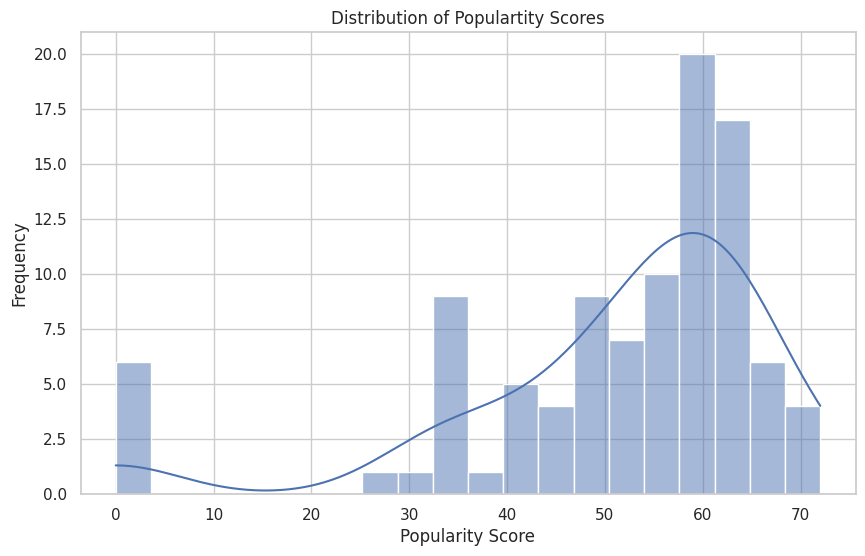

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# plotting the distribution of popularity
plt.figure(figsize=(10, 6))
sns.histplot(music_data_cleaned['Popularity'], bins=20, kde=True)
plt.title('Distribution of Populartity Scores')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()

The distribution of popularity scores shows a range mainly between 40 to 70, with peaks around the 50s and 60s. This indicates that most tracks in this dataset have moderate to high popularity.

Now, let’s have a look at the correlation matrix:

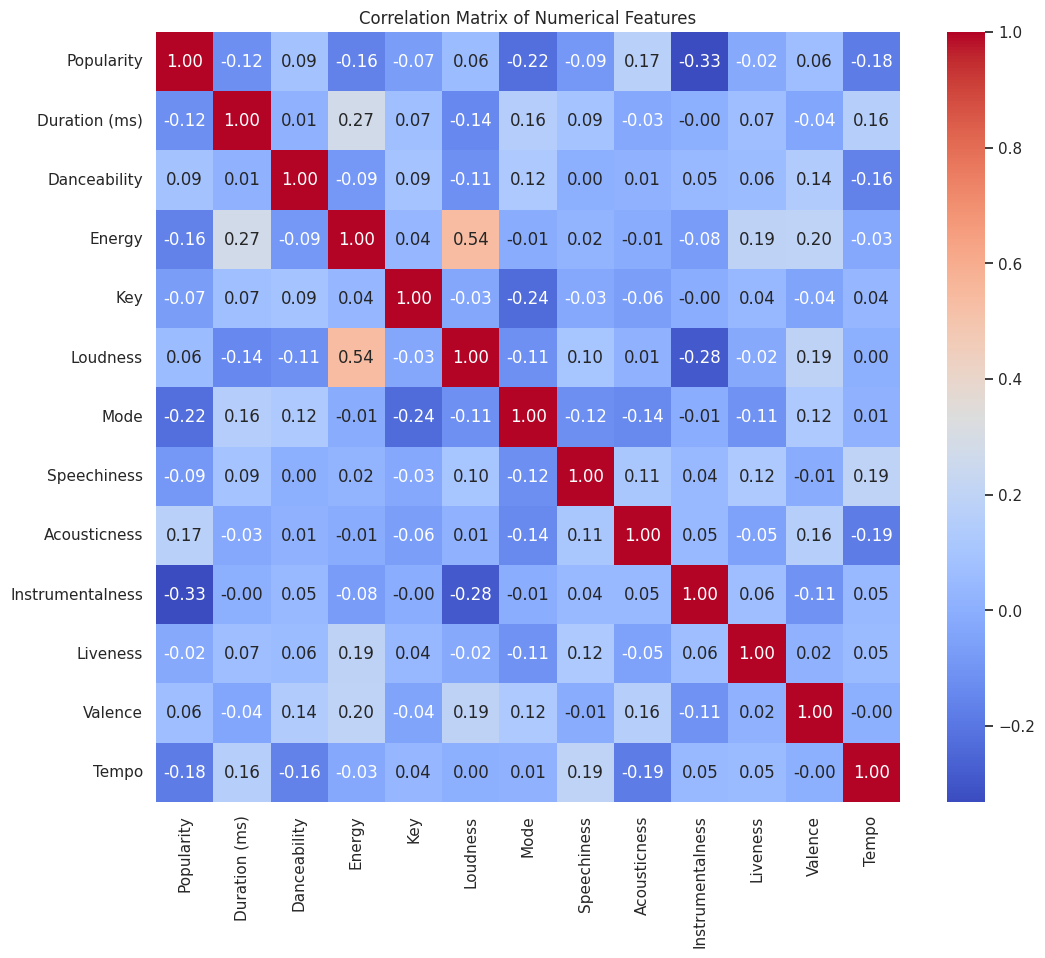

In [8]:
plt.figure(figsize=(12, 10))
correlation_matrix = music_data_cleaned.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

The heatmap provides insights into how various features are related to each other and the popularity of the tracks. Notably, Popularity seems to have some level of positive correlation with Loudness and Energy, while it has slight negative correlations with Acousticness. This suggests that louder and more energetic tracks tend to be more popular, while more acoustic tracks tend to be less popular.

Danceability and Valence (the musical positiveness conveyed by a track) also show some positive correlation with popularity, indicating that tracks that are more danceable and have a happier tone might be preferred by listeners.

Now, let’s delve into the individual feature impacts on the popularity of music tracks. We’ll focus on several key features based on our initial observations from the correlation matrix. Specifically, we’ll analyze:

1. Danceability vs. Popularity

2. Energy vs. Popularity

3. Loudness vs. Popularity

4. Acousticness vs. Popularity

5. Valence vs. Popularity

For each of these features, we’ll create scatter plots to visualize their relationship with popularity. This will help us understand how each feature might influence the popularity of a track:

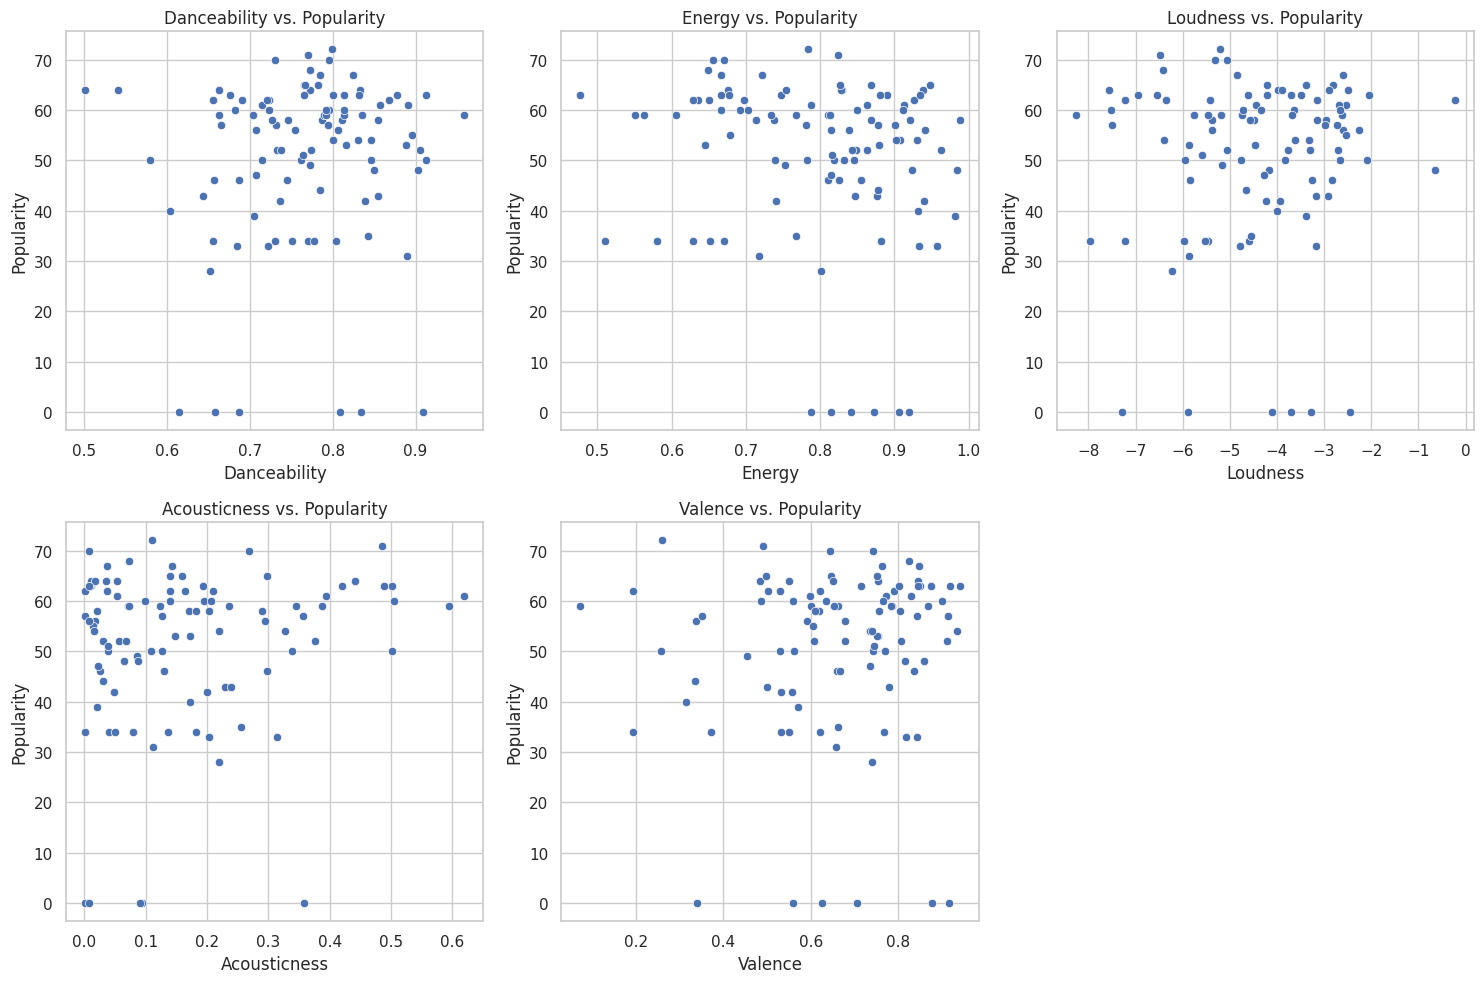

In [10]:
# creating scatter plots for various features vs. popularity
features = ['Danceability', 'Energy', 'Loudness', 'Acousticness', 'Valence']
plt.figure(figsize=(15, 10))

for i, feature in enumerate (features, 1):
  plt.subplot(2, 3, i)
  sns.scatterplot(x=music_data_cleaned[feature], y=music_data_cleaned['Popularity'])
  plt.title(f'{feature} vs. Popularity')
  plt.xlabel(feature)
  plt.ylabel('Popularity')

plt.tight_layout()
plt.show()

Here are the scatter plots visualizing the relationships between various musical features and the popularity of tracks:

1. **Danceability vs. Popularity:** Higher danceability scores tend to correlate with moderate to high popularity. This suggests that more danceable tracks are generally more popular.

2. **Energy vs. Popularity:** Similar to danceability, higher energy levels in tracks often correlate with higher popularity. This aligns with the trend that energetic tracks are preferred by listeners.

3. **Loudness vs. Popularity:** There’s a trend showing that louder tracks tend to have higher popularity scores. This might reflect listener preference for more vibrant and powerful sound profiles.

4. **Acousticness vs. Popularity:** Acousticness shows a somewhat inverse relationship with popularity, where tracks with lower acousticness tend to be more popular. This could suggest that highly acoustic tracks are less favoured in the dataset’s music genre context.

5. **Valence vs. Popularity:** Tracks with higher valence, which indicates a happier or more positive tone, show a slight tendency towards higher popularity. This might imply that listeners prefer tracks that have a positive emotional tone.


Now, let’s have a look at how danceability, energy, and other features impact popularity differently when the track is explicit versus when it’s not. This can reveal whether explicit content has a modifying effect on the relationship between audio features and popularity:

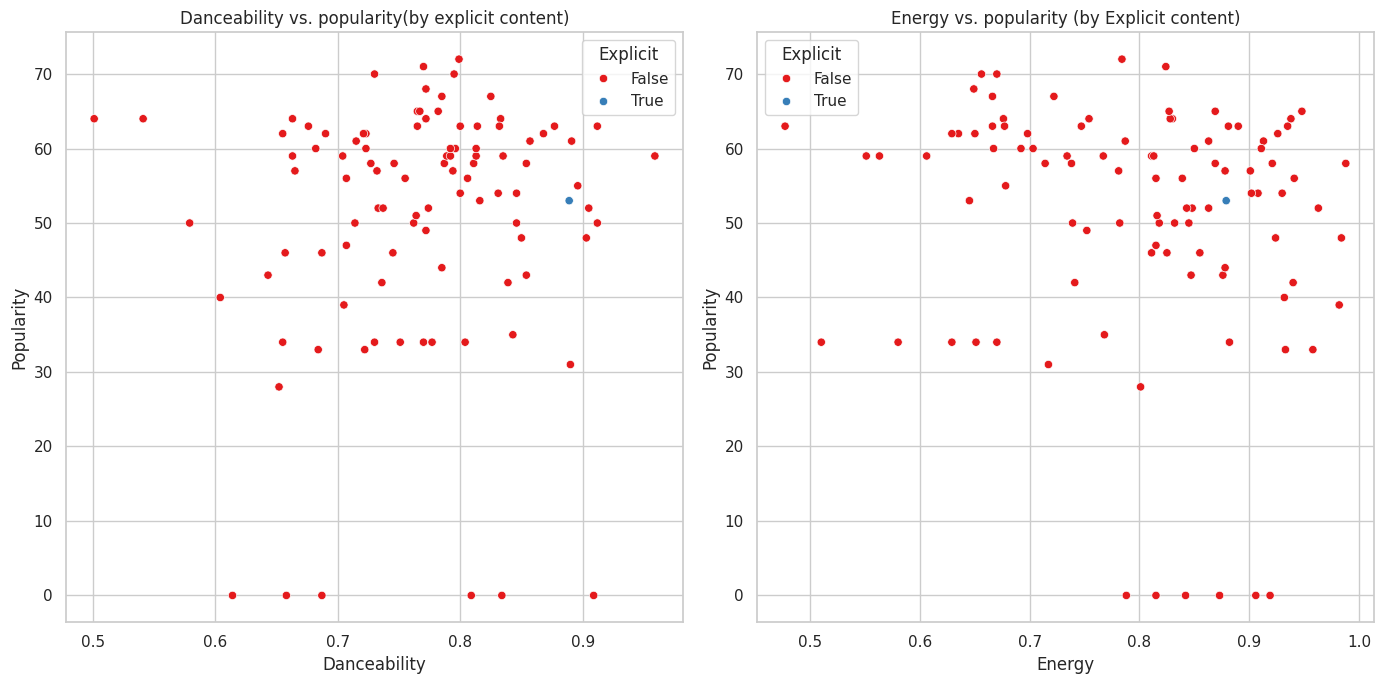

In [12]:
# creating plots for danceability vs. popularity and energy vs. popularity, segmented by explicit content
plt.figure(figsize=(14, 7))

# danceability vs. popularity
plt.subplot(1, 2, 1)
sns.scatterplot(x='Danceability', y='Popularity', hue='Explicit', data=music_data_cleaned, palette='Set1')
plt.title('Danceability vs. popularity(by explicit content)')
plt.xlabel('Danceability')
plt.ylabel('Popularity')

# energy vs. popularity
plt.subplot(1, 2, 2)
sns.scatterplot(x='Energy', y='Popularity', hue='Explicit', data=music_data_cleaned, palette='Set1')
plt.title('Energy vs. popularity (by Explicit content)')
plt.xlabel('Energy')
plt.ylabel('Popularity')

plt.tight_layout()
plt.show()

The segmented scatter plots for Danceability vs. Popularity and Energy vs. Popularity, divided by whether tracks are explicit or not, show some interesting trends:

1. **Danceability vs. Popularity:** Both explicit and non-explicit tracks show a positive trend between danceability and popularity. However, explicit tracks tend to cluster slightly higher on the popularity scale at similar levels of danceability compared to non-explicit tracks.

2. **Energy vs. Popularity:** Similar to danceability, there’s a generally positive relationship between energy and popularity for both explicit and non-explicit tracks. Explicit tracks appear to achieve higher popularity at lower energy levels compared to non-explicit tracks, suggesting that the explicit content may appeal to certain listener groups more, irrespective of energy level.

**Statistical Modelling of Music Features**

Now, let’s quantitatively assess the impact of various features on the popularity of music tracks using statistical modelling. We can use a regression model. This will allow us to understand which features are significant predictors of popularity, and quantify their impact.

For statistical modelling, we’ll use features that show promising relationships and convert categorical data (like Explicit) into a format suitable for regression analysis. We’ll also include the Key and Mode as they might carry additional information about the musical properties of the tracks.

Let’s start by preparing the features and setting up our dataset for statistical modelling using Linear Regression:

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# preparing the dataset for regression
# convert 'Explicit' from boolean to integer (0 or 1)
music_data_cleaned['Explicit'] = music_data_cleaned['Explicit'].astype(int)

# selecting features and target for the model
features = ['Danceability', 'Energy', 'Loudness', 'Acousticness', 'Valence', 'Explicit', 'Key', 'Mode', 'Speechiness', 'Instrumentalness', 'Tempo']
X = music_data_cleaned[features]
y = music_data_cleaned['Popularity']

# standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predicting on the test set
y_pred = model.predict(X_test)

# evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# outputting the coefficients and performance metrics
coefficients = pd.Series(model.coef_, index=features)
coefficients

,0
Danceability,1.249640e+00
Energy,-3.204815e+00
Loudness,1.141456e+00
Acousticness,2.469403e+00
Valence,2.125671e+00
Explicit,1.620926e-14
Key,-3.189486e+00
Mode,-5.859715e+00
Speechiness,3.398224e-02
Instrumentalness,3.390750e-01


The output above represents the coefficients from the regression model quantifying the impact of various musical features on track popularity. A positive coefficient indicates that an increase in the feature is associated with an increase in popularity, and vice versa for a negative coefficient.

For instance, Danceability (1.249640), Loudness (1.141456), Acousticness (2.469403), and Valence (2.125671) all have positive coefficients, suggesting that tracks with higher values in these features tend to be more popular.


On the contrary, Energy (-3.204815), Key (-3.189486), Mode (-5.859715), and Tempo (-1.865736) are negatively associated with popularity, indicating that higher values in these features could lead to lower popularity.

The coefficients for Explicit (1.620926e-14) and Speechiness (0.03398224) suggest a negligible impact on the popularity, with Explicit essentially having no effect. Instrumentalness (0.3390750) shows a minor positive influence.